# Predict medical expenses using linear regression

Data Info -
#age: An integer indicating the age of the primary beneficiary
#sex: The policy holder's gender, either male or female.
#bmi: The body mass index (BMI), which provides a sense of how over- or under-weight a person is relative to their height
#children: An integer indicating the number of children/dependents covered by the insurance plan.
#smoker: A yes or no categorical variable that indicates whether the insured regularly smokes tobacco.
#region: The beneficiary's place of residence in the US


# Question 1- Get the data.



The data is given in Olympus with the name insurance.csv. You need to load the data with the help of pandas.

In [224]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns

from sklearn.model_selection import train_test_split
# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

from scipy.stats import zscore
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [163]:
df_ins = pd.read_csv("insurance.csv")

In [164]:
df_ins.shape

(1338, 7)

In [165]:
df_ins.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [166]:
df_ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Question 2 - Check the distribution of expenses(charges) and state your insights.

In [167]:
df_ins.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [215]:
df_ins.isna().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

No missing values

In [169]:
df_ins.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [170]:
# Assigning the values to smoker category
df_ins['smoker'] = df_ins['smoker'].replace({'no': 0, 'yes': 1})

In [171]:
df_ins['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [172]:
# Assigning the values to region category
df_ins['region'] = df_ins['region'].replace({'southwest': 1, 'southeast': 2, 'northwest': 3, 'northeast': 4})

In [173]:
# creating a dict file  
gender = {'male': 0,'female': 1} 

In [174]:
# Assigning the values to region category
df_ins.sex = [gender[item] for item in df_ins.sex]

In [175]:
df_ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


In [176]:
df_ins["sex"] = df_ins["sex"].astype('category')
df_ins["smoker"] = df_ins["smoker"].astype('category')
df_ins["region"] = df_ins["region"].astype('category')

In [177]:
df_ins.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [178]:
df_ins.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


/Users/ashishsingh/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


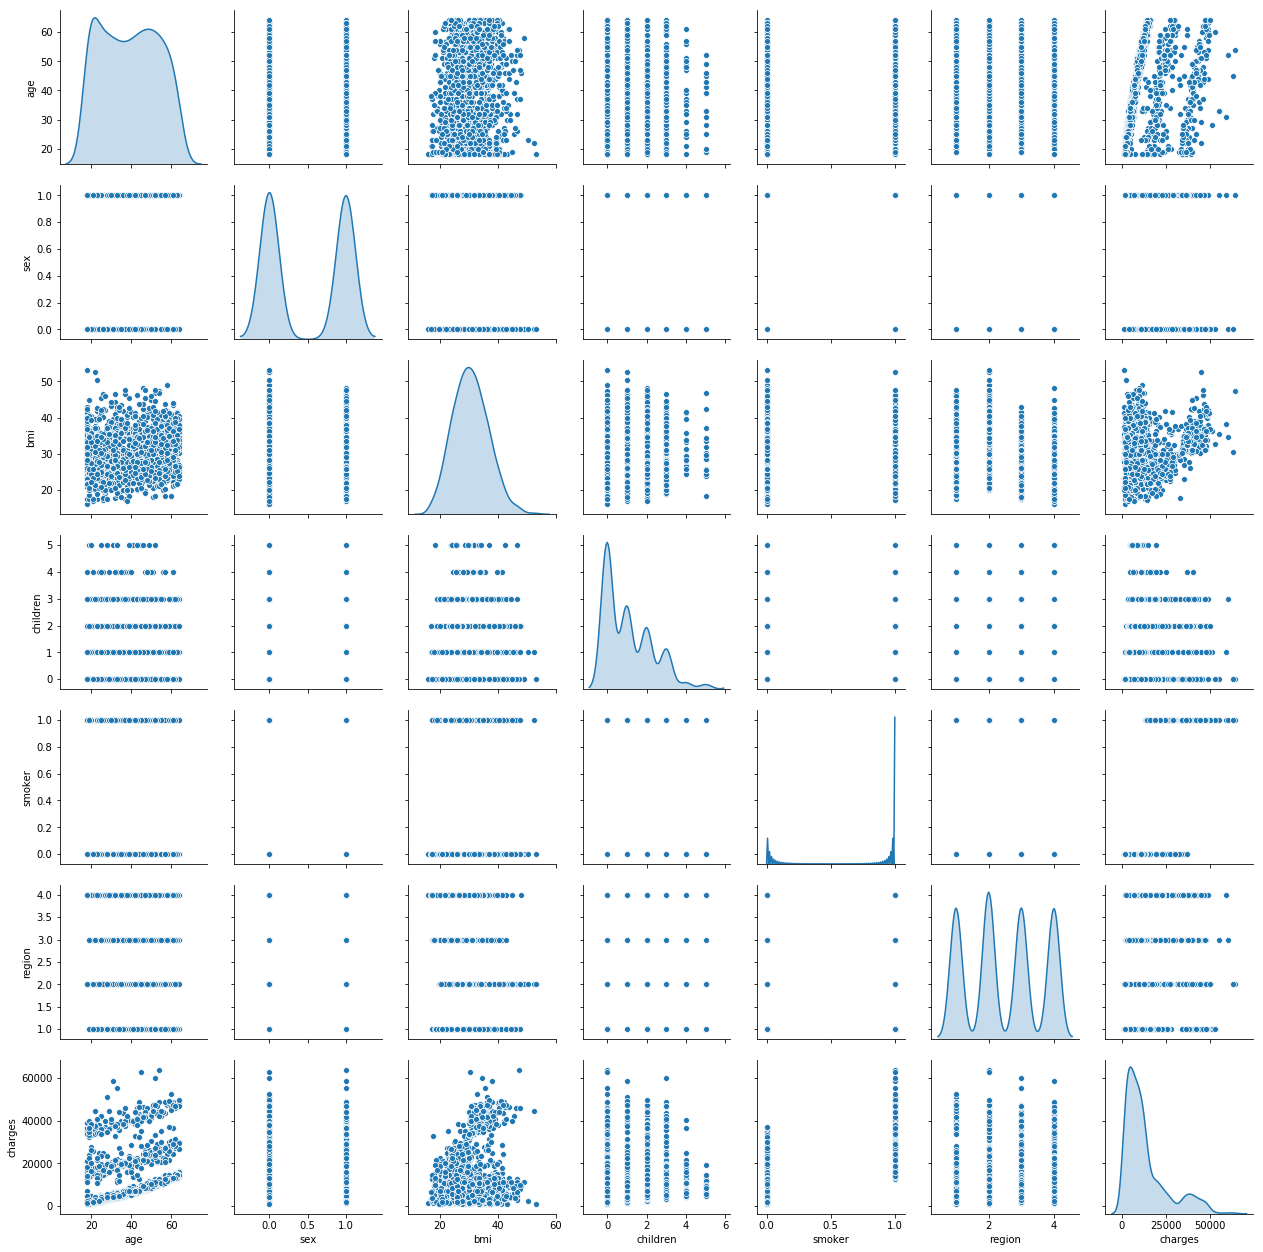

In [179]:
sns.pairplot(df_ins, diag_kind= 'kde')

In [180]:
df_ins.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


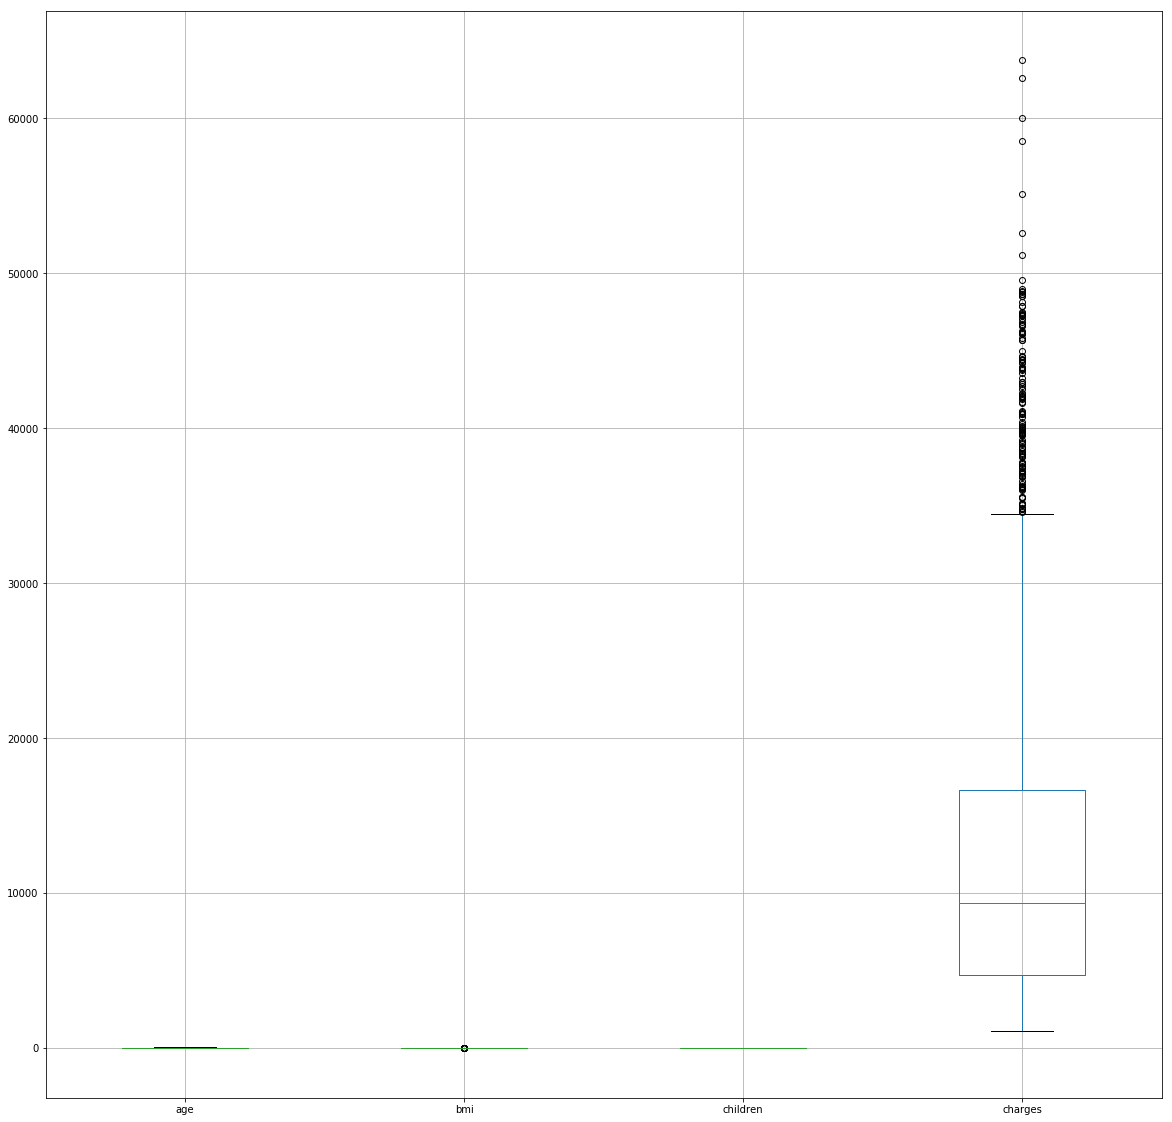

In [181]:
df_ins.boxplot(figsize=[20,20])

too many outliers for charges 

# As the age increases or people with higher BMI or smoking habit, insurance charges increase.

# Question 3 - Explore the relationship between variables. 

You can use corr() function or any other function to do the same.

In [182]:
df_ins.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Charges has the maximum correlation with column 'smoker' followed by 'age' and 'bmi' which tells the sequence in which the columns impact 'charges'

# Question 4 - Use charges as dependent feature and Get the train and test data from your dataset.

In [183]:
# handling the outliers for charges column
df_ins.charges = np.log(df_ins.charges)

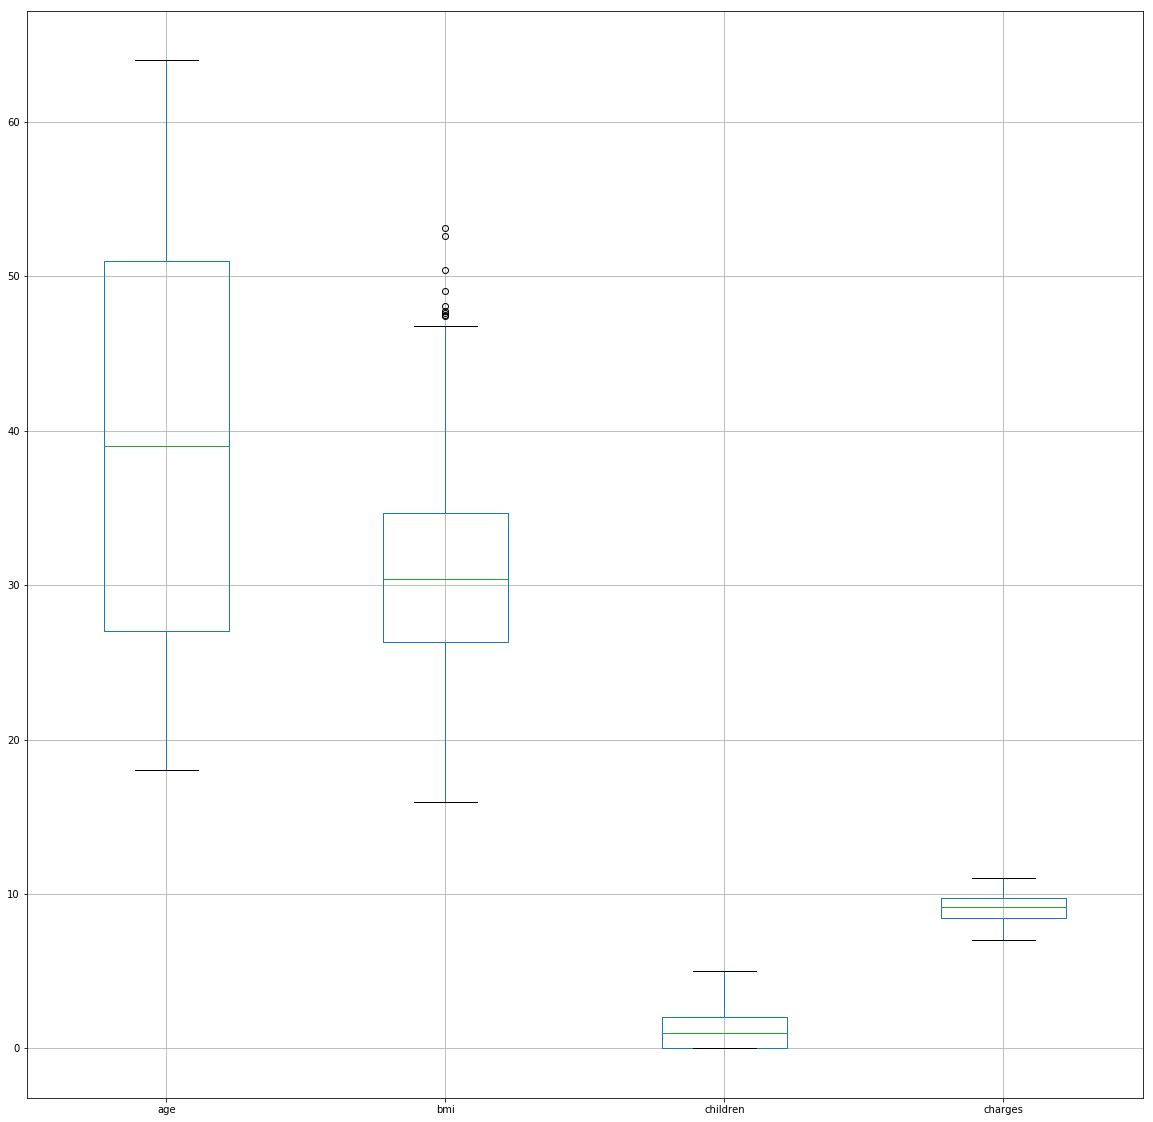

In [184]:
df_ins.boxplot(figsize=[20,20])

/Users/ashishsingh/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


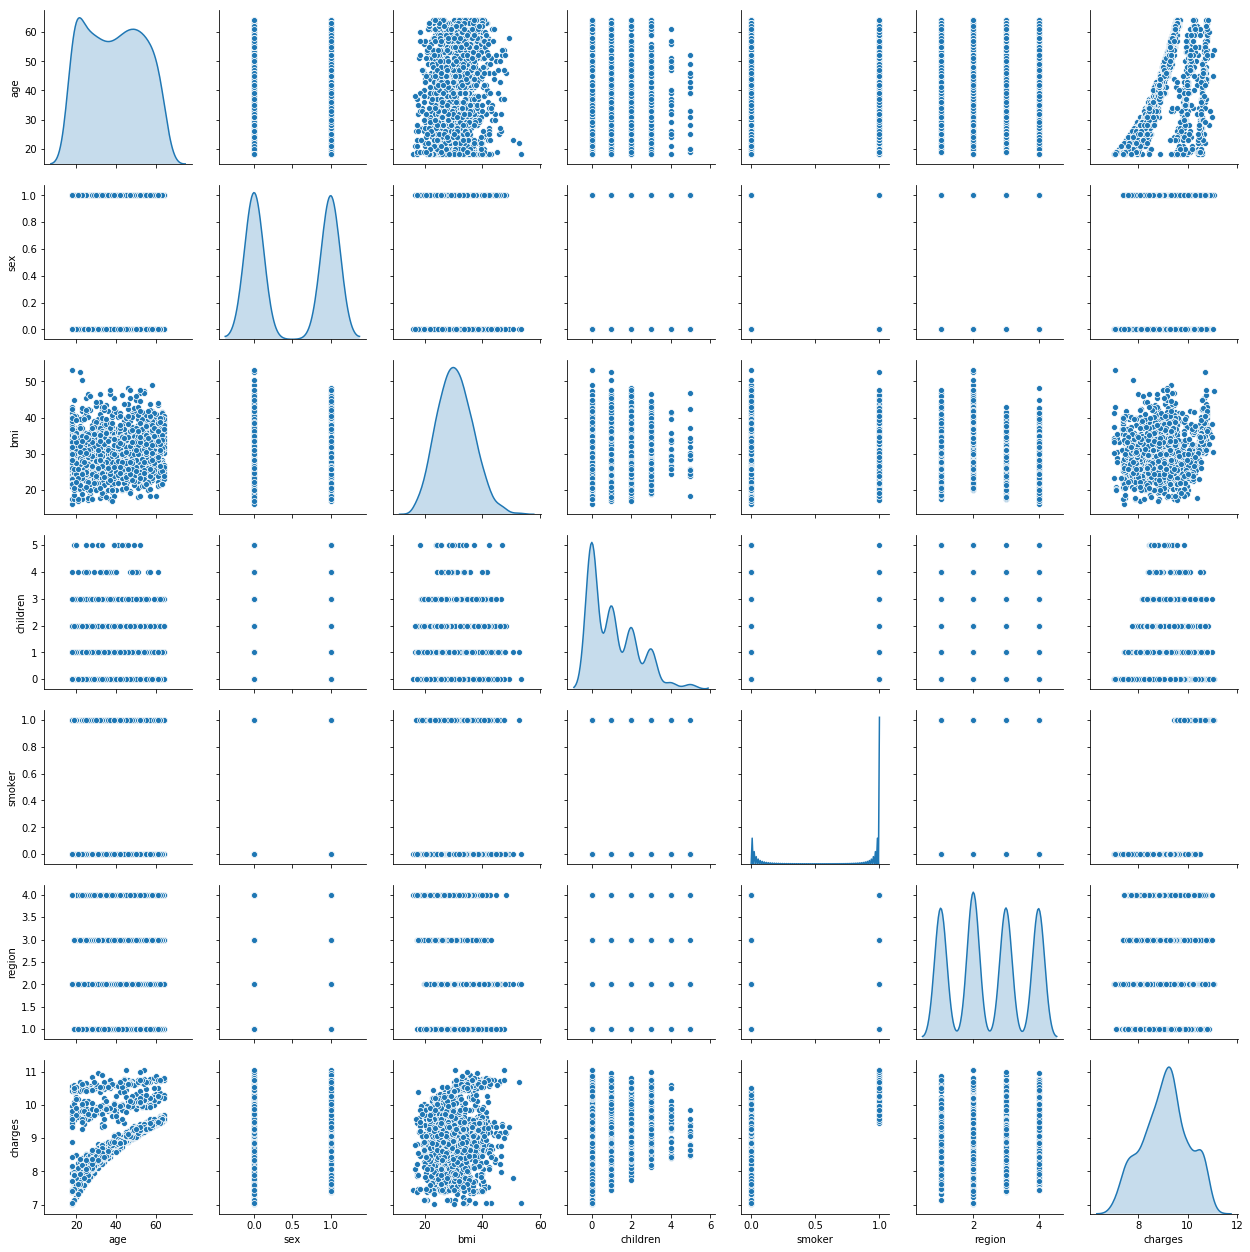

In [185]:
sns.pairplot(df_ins,diag_kind='kde')

In [186]:
#Defining X as the independent dataset and y as dependent dataset
X = df_ins.drop(labels = 'charges',axis=1)
y = df_ins[["charges"]]

In [187]:
X.shape

(1338, 6)

In [188]:
y.shape

(1338, 1)

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 1)

# Question 5 - Create the dummies for the categorical variables/features for both train and test independent data.

You can use pd.get_dummies() function to do so.

In [190]:
X_train.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
dtype: object

In [192]:
#Applying one hot coding technique
X_train = pd.get_dummies(X_train,columns=['sex','smoker','region'])

In [193]:
X_train.dtypes

age           int64
bmi         float64
children      int64
sex_0         uint8
sex_1         uint8
smoker_0      uint8
smoker_1      uint8
region_1      uint8
region_2      uint8
region_3      uint8
region_4      uint8
dtype: object

In [194]:
#Applying one hot coding technique
X_test = pd.get_dummies(X_test,columns=['sex','smoker','region'])

# Question 6 - Train your model.

In [196]:
# invoke the LinearRegression function and find the bestfit model on training data
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Question 7 - Fit your model and get the summary of model. Print the coefficients.

In [197]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for age is 0.033624808403378476
The coefficient for bmi is 0.013408935234755491
The coefficient for children is 0.09440339800795848
The coefficient for sex_0 is -0.045559367155367576
The coefficient for sex_1 is 0.04555936715536767
The coefficient for smoker_0 is -0.7782929847367748
The coefficient for smoker_1 is 0.7782929847367744
The coefficient for region_1 is -0.0482469361270238
The coefficient for region_2 is -0.07420820615988875
The coefficient for region_3 is 0.03314453596272745
The coefficient for region_4 is 0.08931060632418511


In [198]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 7.735298466713385


# Question 8 - Predict the charges for test data and evaluate the model performance. 

You can get the values of MAE, MSE, RMSE to show the evaluation parameters of your model

In [199]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(X_test, y_test)

0.7874295196197602

In [200]:
# Let us check the sum of squared errors by predicting value of y for training cases and 
# subtracting from the actual y for the training cases

mse = np.mean((regression_model.predict(X_test)-y_test)**2)
mse

charges    0.178811
dtype: float64

In [201]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

import math

math.sqrt(mse)

0.42286088531906196

In [202]:
# predict mileage (mpg) for a set of attributes not in the training or test set
y_pred = regression_model.predict(X_test)

In [203]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
mae

0.2723385678178745

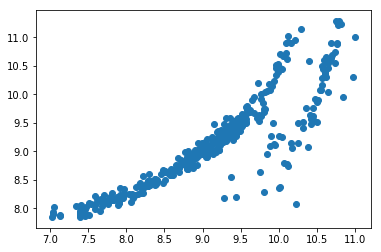

In [204]:
# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
plt.scatter(y_test['charges'], y_pred)

# Naive Bayes with IRIS Data

# Question 9 - Import Iris dataset from Sklear lib and slice the data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

#### **Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

In [205]:
df_iris = pd.read_csv("iris.csv",names=["sepal_length_in_cm","sepal_width_in_cm","petal_length_in_cm","petal_width_in_cm","class"])

In [206]:
df_iris.shape

(150, 5)

In [207]:
df_iris.columns

Index(['sepal_length_in_cm', 'sepal_width_in_cm', 'petal_length_in_cm',
       'petal_width_in_cm', 'class'],
      dtype='object')

In [208]:
df_iris.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sepal_length_in_cm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width_in_cm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length_in_cm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width_in_cm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [209]:
df_iris.dtypes

sepal_length_in_cm    float64
sepal_width_in_cm     float64
petal_length_in_cm    float64
petal_width_in_cm     float64
class                  object
dtype: object

In [210]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length_in_cm    150 non-null float64
sepal_width_in_cm     150 non-null float64
petal_length_in_cm    150 non-null float64
petal_width_in_cm     150 non-null float64
class                 150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [212]:
df_iris.isnull().sum()

sepal_length_in_cm    0
sepal_width_in_cm     0
petal_length_in_cm    0
petal_width_in_cm     0
class                 0
dtype: int64

In [214]:
df_iris.isna().any()

sepal_length_in_cm    False
sepal_width_in_cm     False
petal_length_in_cm    False
petal_width_in_cm     False
class                 False
dtype: bool

In [216]:
#Defining X as the independent dataset and y as dependent dataset
X_iris = df_iris.drop(labels = 'class',axis=1)
y_iris = df_iris["class"]

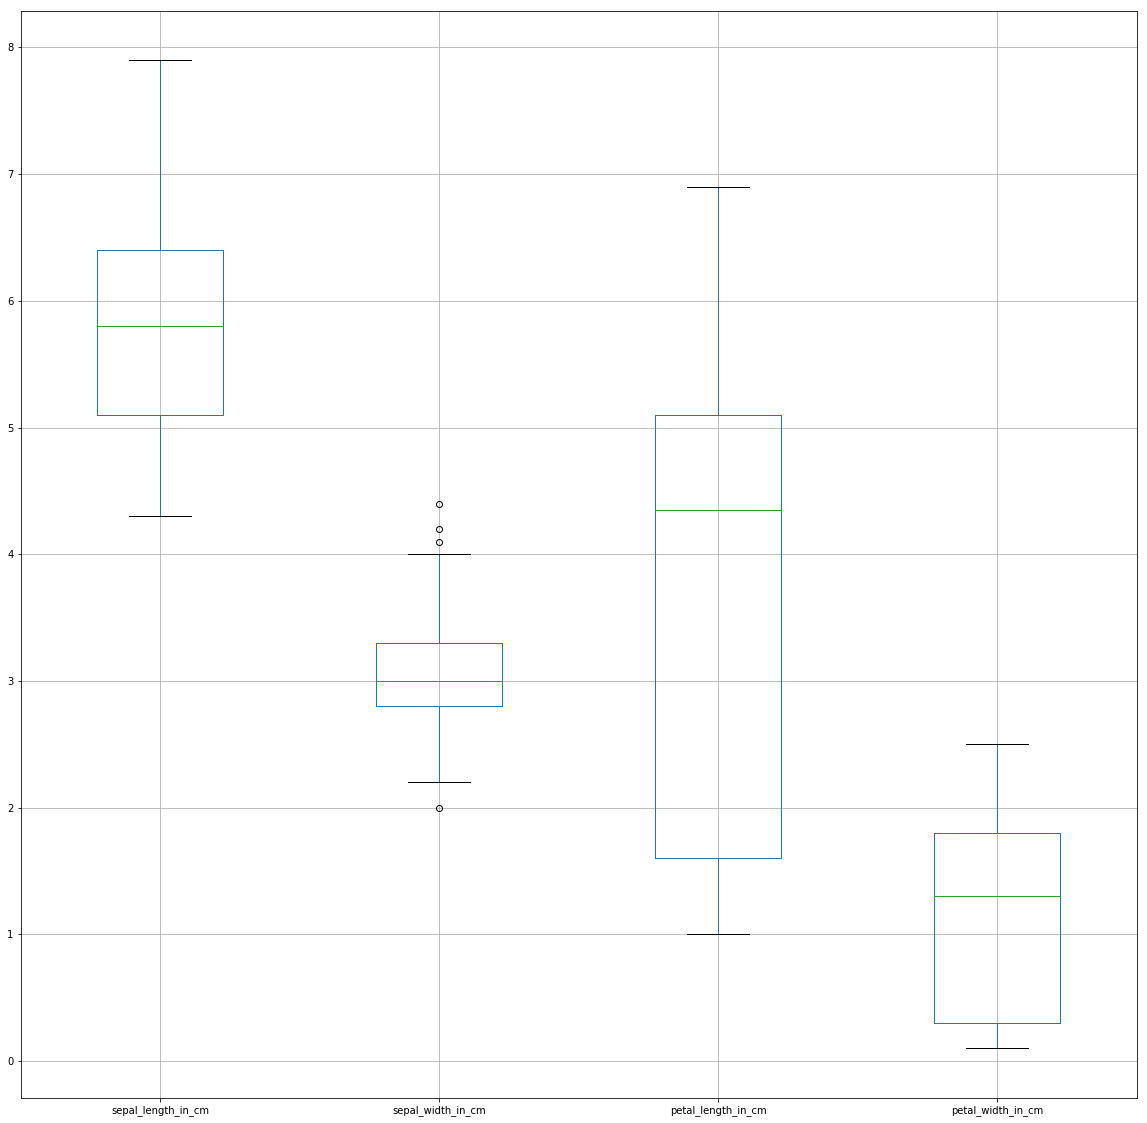

In [217]:
X_iris.boxplot(figsize=[20,20])

In [219]:
#handling the outliers for column 'sepal_width_in_cm'
X_iris['sepal_width_in_cm'] = np.log(X_iris['sepal_width_in_cm'])

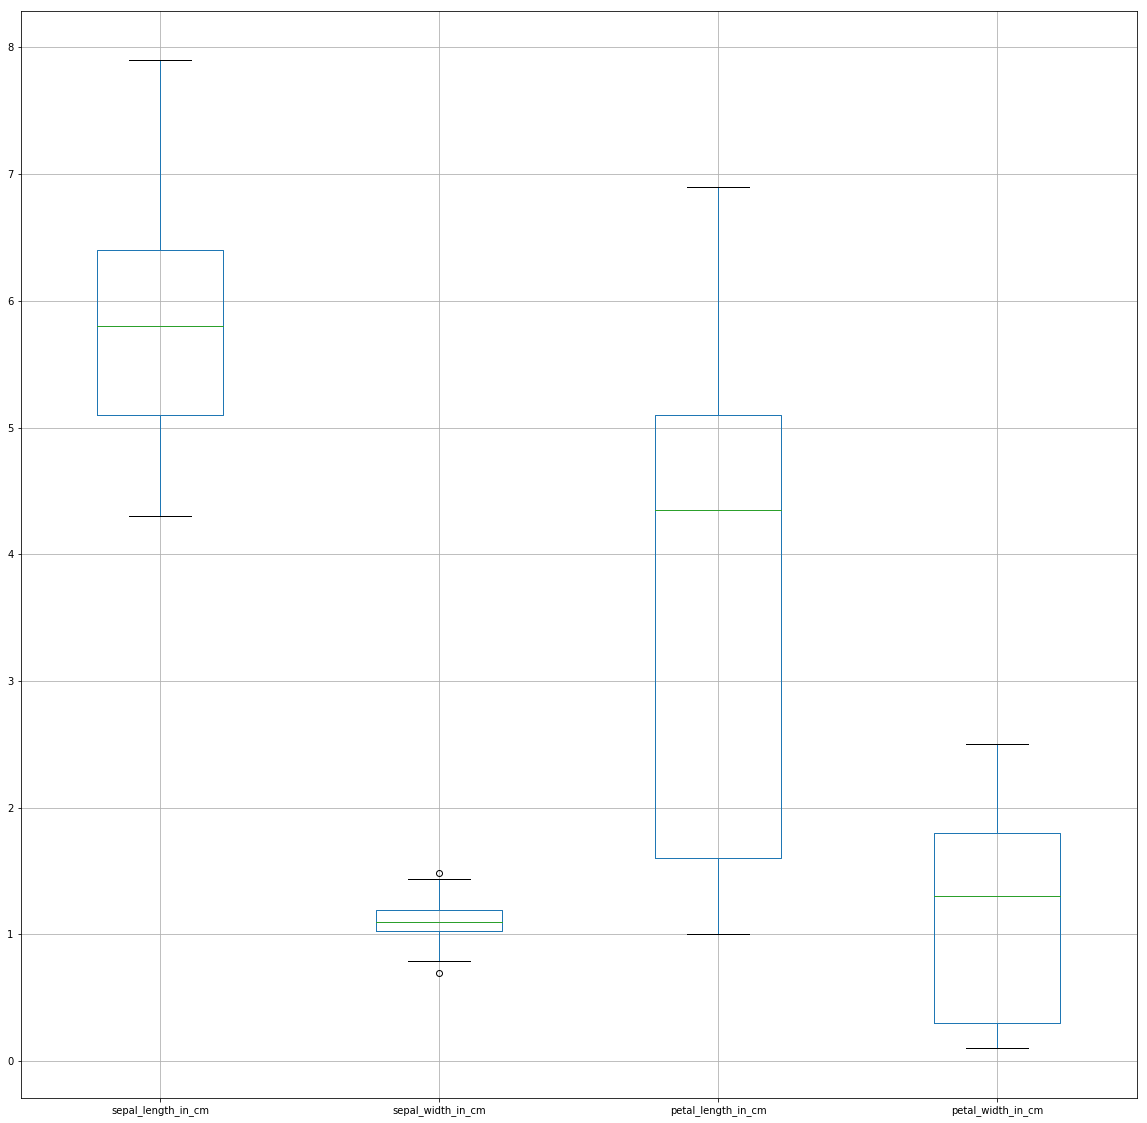

In [220]:
X_iris.boxplot(figsize=[20,20])

## Question 10 - Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

/Users/ashishsingh/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


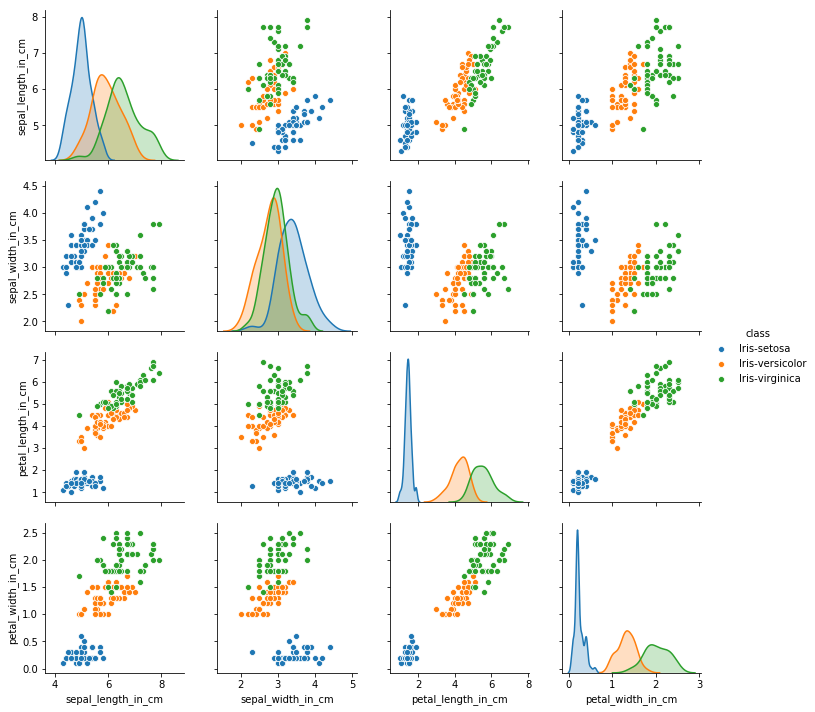

In [221]:
sns.pairplot(df_iris,diag_kind='kde',hue='class')

columns 'petal_length_in_cm'and 'petal_width_in_cm' can be used to predict the class

## Question 11- Do Feature Scaling 

In [226]:
# Method 1 -  applying StandardScaler
# z = (x - u) / s
# where u is the mean of the training samples or zero if with_mean=False, 
# and s is the standard deviation of the training samples or one if with_std=False.

X_iris_standard = StandardScaler().fit_transform(X_iris)

In [227]:
#Method 2: Create a separate dataframe consisting only of the features i.e independent attributes

# convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
# It is always adviced to scale numeric attributes in models that calculate distances.

X_iris_z = X_iris.apply(zscore)  # convert all attributes to Z scale 

X_iris_z.describe()



,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-2.775558e-16,1.313764e-17,1.154632e-16,9.251859e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.913276e+00,-1.568735e+00,-1.444450e+00
25%,-9.006812e-01,-5.415168e-01,-1.227541e+00,-1.181504e+00
50%,-5.250608e-02,-5.519289e-02,3.362659e-01,1.332259e-01
75%,6.745011e-01,6.166391e-01,7.627586e-01,7.905908e-01
max,2.492019e+00,2.644481e+00,1.786341e+00,1.710902e+00


In [228]:
# Capture the class values from the 'diagnosis' column into a pandas series akin to array 

# bc_labels = bc_df["diagnosis"]

# store the normalized features data into np array 

X1 = np.array(X_iris_z)
X1.shape



(150, 4)

In [229]:
# store the bc_labels data into a separate np array

y1 = np.array(y_iris)
y1.shape

(150,)

## Question 12- Train and Fit NaiveBayes Model

Method 1

In [239]:
xtrain_std,xtest_std,ytrain_std,ytest_std = train_test_split(X_iris_standard,y_iris,test_size=0.3,random_state=1)

In [240]:
xtrain_std.shape

(105, 4)

In [241]:
ytrain_std.shape

(105,)

In [242]:
# Invoking the NB Gaussian function to create the model
# fitting the model in the training data set
model = GaussianNB()
model.fit(xtrain_std, ytrain_std)

GaussianNB(priors=None)

Method 2

In [243]:
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X1,y1,test_size = 0.30, random_state = 1)

In [244]:
X_train_iris.shape

(105, 4)

In [245]:
y_train_iris.shape

(105,)

In [246]:
# Invoking the NB Gaussian function to create the model
# fitting the model in the training data set
model = GaussianNB()
model.fit(X_train_iris, y_train_iris)

GaussianNB(priors=None)

## Question 13 - Print Accuracy and Confusion Matrix and Conclude your findings

Method 1

In [247]:
model.score(xtrain_std, ytrain_std)      # performance on test data

0.9523809523809523

Method 2

In [248]:
model.score(X_train_iris, y_train_iris)      # performance on test data

0.9523809523809523

Using both the methods same result as underlying logic is the same

In [249]:
test_pred = model.predict(X_test_iris)

print(metrics.classification_report(y_test_iris, test_pred))
print(metrics.confusion_matrix(y_test_iris, test_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      0.94      0.94        18
 Iris-virginica       0.92      0.92      0.92        13

    avg / total       0.96      0.96      0.96        45

[[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]


Precision for 'Iris-setosa' is 1 which means that it predicted correctly 100% of times


# Ensemble Methods

## Question 14-  Apply the Random forest model and print the accuracy of Random forest Model


In [250]:

Rf_model = RandomForestClassifier(n_estimators=50,criterion='entropy',max_depth=3,random_state=0 )
Rf_model.fit(X_train_iris, y_train_iris)
y_predict_Rf=Rf_model.predict(X_test_iris)


In [251]:
Rf_acc=metrics.accuracy_score(y_test_iris,y_predict_Rf)
print(Rf_acc)

0.9555555555555556


In [252]:
Rf_cr=metrics.classification_report(y_test_iris , y_predict_Rf)
print(Rf_cr)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      0.94      0.94        18
 Iris-virginica       0.92      0.92      0.92        13

    avg / total       0.96      0.96      0.96        45



## Question 15 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [100]:
from sklearn.ensemble import GradientBoostingClassifier

gbcl = GradientBoostingClassifier(n_estimators = 51)
gbcl.fit(X_train_iris, y_train_iris)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=51,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [102]:
y_predict_gb=gbcl.predict(X_test_iris)
metrics.accuracy_score(y_test_iris,y_predict_gb)

0.9555555555555556